In [ ]:
import tensorflow as tf


from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
print(f'Tensorflow version: {tf.__version__}')
print(f'Keras version: {keras.__version__}')

Tensorflow version: 2.17.1
Keras version: 3.5.0


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random

# 1. Load Data

In [ ]:
#Load data
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
print(f"Số lượng mẫu trong tập huấn luyện: {X_train.shape}")
print(f"Số lượng mẫu trong tập kiểm tra: {X_test.shape}")

Số lượng mẫu trong tập huấn luyện: (60000, 28, 28)
Số lượng mẫu trong tập kiểm tra: (10000, 28, 28)


In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
#Tên các nhãn tương ứng với số
name_class = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
from typing import Optional
#Tạo hàm show ảnh
def show_anh(X_data: np.ndarray, y_data:np.ndarray, y_predict: Optional[np.ndarray] = None):
  nrows, ncols = 2,4
  fig, axes = plt.subplots(nrows, ncols, figsize=(8,5))
  #Lấy số lượng của X_data
  len_x = X_data.shape[0]
  for idx in range(nrows*ncols):
    ax = axes[idx // ncols, idx % ncols]
    #Lấy ngẫu nhiên 1 index
    idx_random = random.randint(0, len_x)
    ax.imshow(X_data[idx_random], cmap ='gray')
    #Hiển thị nhãn đúng
    color = 'green'
    true_label = f'True label: {name_class[y_data[idx_random]]}'

    #Kiểm tra có biến dự đoán không
    if y_predict is not None:
      predict_label = f'Predict label: {name_class[y_predict[idx_random]]}'
      color = 'red' if y_data[idx_random] != y_predict[idx_random] else 'green'
      true_label = true_label + '\n' + predict_label
    ax.set_xlabel(true_label,color = color)
    ax.set(xticks = [],yticks = [])
  plt.show()


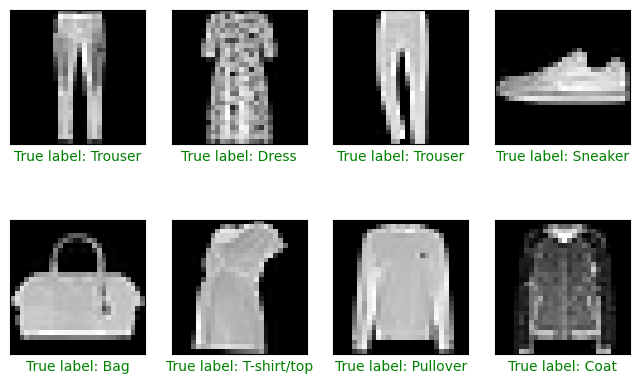

In [ ]:
#Hiển thị ảnh ngẫu nhiên từ tập train
show_anh(X_train,y_train)

# 2. Tiền xử lý ảnh

In [ ]:
#Tạo bản sao dữ liệu
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

In [ ]:
#Đưa ảnh về chỉ còn 2 giá trị là 0 và 1 và đưa định dạng ảnh vè float32
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [ ]:
#Đưa thông số chiều vào
X_train = np.expand_dims(X_train,-1)
X_test = np.expand_dims(X_test,-1)

In [ ]:
#Chuyển nhãn sang dạng one hot
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

# 3. Network (ANN) Architecture

In [ ]:
input_shape = (28,28,1)

In [ ]:
model = keras.Sequential([
    layers.Flatten(input_shape = input_shape),
    layers.Dense(512, activation = 'relu'),
    layers.Dense(256, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')

])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

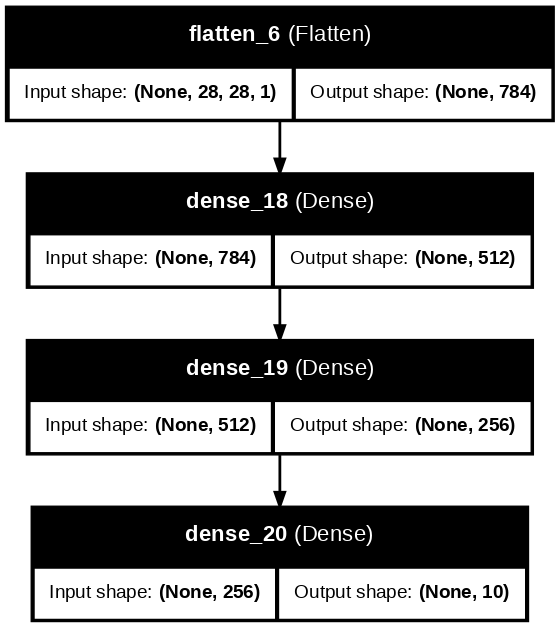

In [ ]:
# Trực quan hóa mô hình
plot_model(model, show_shapes=True, show_layer_names=True,dpi=100)

In [ ]:
model.compile(
    optimizer = 'rmsprop',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
epochs = 10
batch_size = 256
history = model.fit(X_train, y_train,
          batch_size = batch_size,
          epochs = epochs,
          validation_split = 0.1)

Epoch 1/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.6871 - loss: 0.8759 - val_accuracy: 0.8437 - val_loss: 0.4367
Epoch 2/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8410 - loss: 0.4289 - val_accuracy: 0.8465 - val_loss: 0.4221
Epoch 3/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8662 - loss: 0.3640 - val_accuracy: 0.8643 - val_loss: 0.3720
Epoch 4/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8761 - loss: 0.3331 - val_accuracy: 0.8790 - val_loss: 0.3326
Epoch 5/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8851 - loss: 0.3064 - val_accuracy: 0.8710 - val_loss: 0.3542
Epoch 6/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8906 - loss: 0.2887 - val_accuracy: 0.8458 - val_loss: 0.4313
Epoch 7/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8945 - loss: 0.2816 - val_accuracy: 0.8847 - val_loss: 0.3179
Epoch 8/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9028 - loss: 0.2579 - val_accuracy: 

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [ ]:
train_loss, val_loss = history_dict['loss'], history_dict['val_loss']
train_acc, val_acc = history_dict['accuracy'], history_dict['val_accuracy']

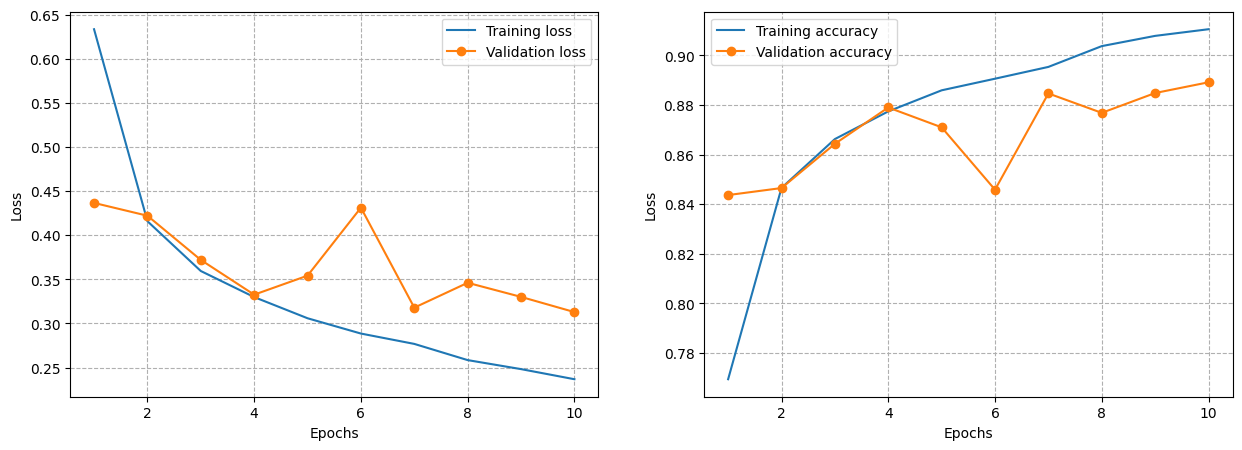

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
epoch_runs = [i+1 for i in range (epochs)]
ax1.plot(epoch_runs, train_loss, label='Training loss')
ax1.plot(epoch_runs, val_loss, label='Validation loss', marker = 'o')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()
ax1.grid(ls='--')

ax2.plot(epoch_runs, train_acc, label='Training accuracy')
ax2.plot(epoch_runs, val_acc, label='Validation accuracy', marker = 'o')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(ls='--')

plt.show()

# 4. Đánh giá mô hình

In [ ]:
#Đánh giá mô hình trên tập test
score = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8863 - loss: 0.3185


In [ ]:
print(f'Test loss: {score[0]}')
print(f'Test accuracy: {score[1]}')

Test loss: 0.325084388256073
Test accuracy: 0.8871999979019165


# 5. Dự đoán với mẫu mới

In [ ]:
#Dự đoán model với mẫu mới
X_sample = X_test[50:60]
y_sample_true = y_test[50:60]
#Dự đoán
y_predict = model.predict(X_sample)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [ ]:
#Chuyển từ dữ liệu số thành nhãn
y_predict = np.argmax(y_predict, axis = 1)
y_sample_true = np.argmax(y_sample_true, axis = 1)

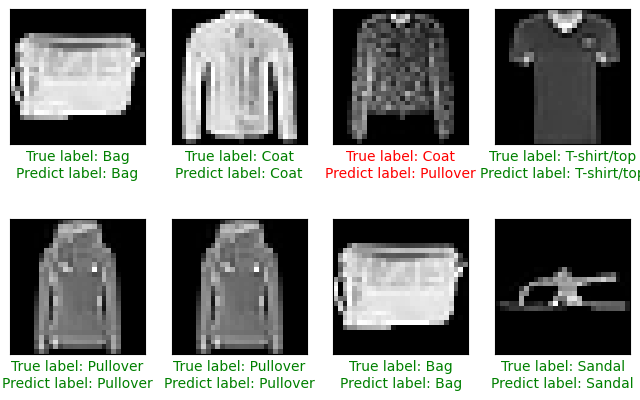

In [ ]:
#Hiển thị 8 ảnh từ 10 ảnh dự đoán
show_anh(X_sample,y_sample_true,y_predict)